In [63]:
import pandas as pd
import numpy as np
import dateutil
import calendar

# package to extract data from various Internet sources into a DataFrame
# make sure you have it installed
from pandas_datareader import data, wb

# package for dates
import datetime as dt

In [64]:
A_vendor_weigh = pd.read_csv('Amazon_5weeks.csv')

In [65]:
#데이터 타임으로 변경
A_vendor_weigh['Date'] = pd.to_datetime(A_vendor_weigh.loc[:,'Date'])
A_vendor_weigh

,Unnamed: 0,Vendor,Product_name,Date,Week,Year,Point,Vote,Title,Review
0,0,Realme,Realme 3 Pro,2019-07-24,30,19,1.0,10,Very bad techinal support and not satisfied wi...,Night mode camera very bad quality. Front came...
1,1,Realme,Realme 3 Pro,2019-07-26,30,19,1.0,1,Battery backup\n,Battery backup is not sufficient.. please not ...
2,2,Realme,Realme 3 Pro,2019-07-28,30,19,1.0,2,Not satisfied\n,The mobile which i received is not good. The s...
3,3,OPPO,OPPO A7,2019-07-25,30,19,1.0,0,Policy not good\n,Phone purchase 6 month EMI with but all amount...
4,4,OPPO,OPPO A7,2019-07-22,30,19,1.0,0,Shortage of accessories\n,Sim ejector tool is missing....
5,5,OPPO,OPPO A7,2019-07-28,30,19,1.0,0,Missing part\n,Very hard missing part
6,6,OPPO,OPPO A7,2019-07-22,30,19,2.0,0,Hi\n,Hi
7,7,Realme,Realme 3 Pro,2019-07-27,30,19,4.0,7,Best phone under 15k\n,Excellent camera.Outstanding gaming and other ...
8,8,Realme,Realme 3 Pro,2019-07-27,30,19,4.0,5,Good phone\n,Very good phone at this price. All features OK.
9,9,Realme,Realme 3 Pro,2019-07-28,30,19,4.0,2,Worth it\n,Good phone in this range.. realme is really good


In [66]:
#두 컬럼만 불러오기
A_vendor_weigh = A_vendor_weigh[['Date', 'Vendor']]
A_vendor_weigh.head()

,Date,Vendor
0,2019-07-24,Realme
1,2019-07-26,Realme
2,2019-07-28,Realme
3,2019-07-25,OPPO
4,2019-07-22,OPPO


In [67]:
# 내림차순으로 정렬
A_vendor_weigh = A_vendor_weigh.sort_values(['Date'], ascending=[False])

In [68]:
# 데이트 뉴, 앞으로 설정
A_vendor_weigh = A_vendor_weigh.set_index('Date')

In [69]:
#주차별로 멀티 인덱스 만들기
A_vendor_weigh1 = A_vendor_weigh.groupby(['Vendor','Date']).resample('w').count().unstack()

In [70]:
#결측값 = 0 처리
A_vendor_weigh1 = A_vendor_weigh1.fillna(0)

In [71]:
#데이트 뉴 행으로 합치기 
A_vendor_weigh2 = A_vendor_weigh1.sum(axis=1, level = 'Date')

In [72]:
#주+벤더별 정렬하기
A_vendor_weigh3 = A_vendor_weigh2.sum(axis=0, level = 'Vendor')

In [73]:
# 칼럼명 변경
A_vendor_weigh3.columns = ["Week30", "Week31", "Week32", "Week33", "Week34"]
A_vendor_weigh3

,Week30,Week31,Week32,Week33,Week34
Vendor,,,,,
Huawei,377.0,355.0,151.0,400.0,441.0
OPPO,1316.0,1430.0,834.0,1286.0,2745.0
Others,248.0,280.0,173.0,322.0,509.0
Realme,392.0,382.0,207.0,378.0,710.0
Samsung,4850.0,3436.0,1109.0,1496.0,7422.0
Vivo,461.0,444.0,183.0,473.0,562.0
Xiaomi,3539.0,3318.0,1266.0,2251.0,4242.0


In [74]:
#가중치 더해서 weight_sum하기
A_vendor_weigh3["Week34"] = A_vendor_weigh3["Week34"] * (0.95)
A_vendor_weigh3["Week33"] = A_vendor_weigh3["Week33"] * (0.90)
A_vendor_weigh3["Week32"] = A_vendor_weigh3["Week32"] * (0.85)
A_vendor_weigh3["Week31"] = A_vendor_weigh3["Week31"] * (0.80)
A_vendor_weigh3["Week30"] = A_vendor_weigh3["Week30"] * (0.75)

In [75]:
#칼럼명으로 오름차순 정렬

A_vendor_weigh3 = A_vendor_weigh3.sort_index(axis =1 , ascending = True)

In [76]:
####################################################
#####주차별 가중치합 (기존의 Weight_sum과 달리, 2~4주차치만 뽑은 데이터!)

A_vendor_weigh3['Weight_sum'] = A_vendor_weigh3['Week34'] + A_vendor_weigh3['Week33'] + A_vendor_weigh3['Week32'] + A_vendor_weigh3['Week31'] + A_vendor_weigh3['Week30']

In [77]:
#내림차순으로 정렬
A_vendor_weigh3 = A_vendor_weigh3.sort_values(["Weight_sum"], ascending=[False])

In [78]:
#Weight_sum탈락시키기
A_vendor_weigh3_review_count = A_vendor_weigh3.drop(A_vendor_weigh3.columns[-1:], axis='columns')
A_vendor_weigh3_review_count

,Week30,Week31,Week32,Week33,Week34
Vendor,,,,,
Samsung,3637.50,2748.8,942.65,1346.4,7050.90
Xiaomi,2654.25,2654.4,1076.10,2025.9,4029.90
OPPO,987.00,1144.0,708.90,1157.4,2607.75
Vivo,345.75,355.2,155.55,425.7,533.90
Realme,294.00,305.6,175.95,340.2,674.50
Huawei,282.75,284.0,128.35,360.0,418.95
Others,186.00,224.0,147.05,289.8,483.55


In [79]:
Amazon_Rating = pd.read_csv('Amazon_5weeks_rating.csv')

In [80]:
Amazon_Rating = Amazon_Rating.drop(Amazon_Rating.columns[0], axis='columns')
Amazon_Rating

,Others,Huawei,Realme,Vivo,OPPO,Xiaomi,Samsung
0,0.972067,1.004914,0.990453,1.000000,1.000000,0.992248,0.956410
1,0.958101,1.029484,0.992840,1.016509,0.991131,0.997416,0.933333
2,0.854749,0.938575,1.002387,0.915094,1.002217,0.953488,0.882051
3,1.050279,0.972973,0.957041,1.023585,1.002217,0.979328,0.897436
4,1.053073,1.019656,1.033413,0.995283,1.002217,1.031008,1.097436


In [81]:
Amazon_Rating = Amazon_Rating[['Samsung', 'Xiaomi', 'OPPO', 'Vivo', 'Realme', 'Huawei', 'Others']]
Amazon_Rating

,Samsung,Xiaomi,OPPO,Vivo,Realme,Huawei,Others
0,0.956410,0.992248,1.000000,1.000000,0.990453,1.004914,0.972067
1,0.933333,0.997416,0.991131,1.016509,0.992840,1.029484,0.958101
2,0.882051,0.953488,1.002217,0.915094,1.002387,0.938575,0.854749
3,0.897436,0.979328,1.002217,1.023585,0.957041,0.972973,1.050279
4,1.097436,1.031008,1.002217,0.995283,1.033413,1.019656,1.053073


In [82]:
Amazon_Rating = np.transpose(Amazon_Rating)
Amazon_Rating

,0,1,2,3,4
Samsung,0.956410,0.933333,0.882051,0.897436,1.097436
Xiaomi,0.992248,0.997416,0.953488,0.979328,1.031008
OPPO,1.000000,0.991131,1.002217,1.002217,1.002217
Vivo,1.000000,1.016509,0.915094,1.023585,0.995283
Realme,0.990453,0.992840,1.002387,0.957041,1.033413
Huawei,1.004914,1.029484,0.938575,0.972973,1.019656
Others,0.972067,0.958101,0.854749,1.050279,1.053073


In [83]:
rating_vendor = A_vendor_weigh3_review_count * Amazon_Rating.values
rating_vendor

,Week30,Week31,Week32,Week33,Week34
Vendor,,,,,
Samsung,3478.942308,2565.546667,831.465641,1208.307692,7737.910769
Xiaomi,2633.674419,2647.541085,1026.048837,1984.020930,4154.858140
OPPO,987.000000,1133.853659,710.471840,1159.966297,2613.532151
Vivo,345.750000,361.064151,142.342925,435.740094,531.381604
Realme,291.193317,303.411933,176.369928,325.585203,697.036993
Huawei,284.139435,292.373464,120.466093,350.270270,427.184889
Others,180.804469,214.614525,125.690782,304.370950,509.213268


In [84]:
####################################################
#####주차별 가중치합 (기존의 Weight_sum과 달리, 2~4주차치만 뽑은 데이터!)


rating_vendor['Weight_sum'] = rating_vendor['Week34'] + rating_vendor['Week33'] +rating_vendor['Week32'] + rating_vendor['Week31'] + rating_vendor['Week30']
# + vendor_weigh_2['Week4']

In [85]:
#내림차순으로 정렬
rating_vendor = rating_vendor.sort_values(["Weight_sum"], ascending=[False])

In [86]:
#Weight_sum탈락시키기
rating_vendor_review_count = rating_vendor.drop(rating_vendor.columns[-1:], axis='columns')

In [87]:
# csv파일로 저장하기
data = pd.DataFrame(rating_vendor)
data.to_csv('Amazon_vendor_weightsum_rating.csv')

In [88]:
#파이차트 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rc

%matplotlib inline

In [89]:
#벤더 + weigh_sum만 불러오기
rating_vendor_sum = rating_vendor[['Weight_sum']]
rating_vendor_sum

,Weight_sum
Vendor,
Samsung,15822.173077
Xiaomi,12446.143411
OPPO,6604.823947
Vivo,1816.278774
Realme,1793.597375
Huawei,1474.434152
Others,1334.693994


C:\Users\LES\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\LES\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upper left|'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


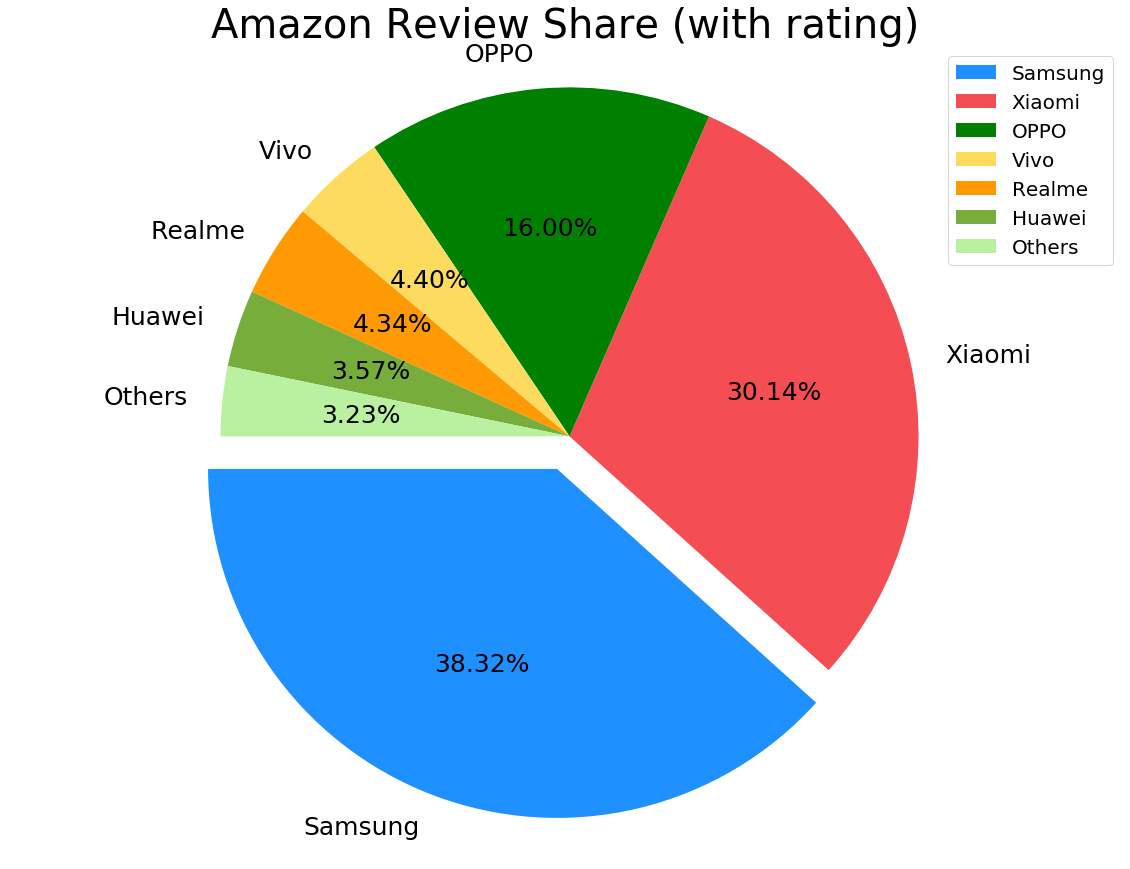

In [91]:
#[ 삼성*블루 = #0A709A // 샤오미*연한레드 = #F44E54  // 리얼미*오렌지 = #FF9904/// 비보*연노  = #FDDB5E // 연한초록 = #76AD3B,  ,  노랑 = #FDDB5E, #BAF1A1 =연두
# [ 초록 = #76AD3B, skyblue

#파이차트 그리기
plt.pie(rating_vendor_sum,
        explode = (0.1, 0 , 0, 0, 0, 0, 0),
        labels = ['Samsung', 'Xiaomi', 'OPPO', 'Vivo',  'Realme', 'Huawei', 'Others'],
        colors = ['dodgerblue','#F44E54', 'green' , '#FDDB5E' ,'#FF9904', '#76AD3B' ,'#BAF1A1'], 
        startangle = 180,
        autopct = '%1.2f%%')

plt.rcParams.update({'font.size': 25})
plt.rcParams['figure.figsize'] = [20, 15]
plt.axis('equal', fontsize=18)
plt.title('Amazon Review Share (with rating)', fontsize = 40)       
plt.legend(fontsize=20, loc='upper left|')

plt.show()

In [92]:
#백분율 구하기 vendor_weigh_2
rating_vendor = (rating_vendor[0:20] / rating_vendor[0:20].sum()) * 100
rating_vendor

,Week30,Week31,Week32,Week33,Week34,Weight_sum
Vendor,,,,,,
Samsung,42.418346,34.123548,26.540180,20.947520,46.415069,38.317634
Xiaomi,32.112091,35.214130,32.751228,34.395475,24.922493,30.141673
OPPO,12.034378,15.081039,22.678088,20.109461,15.677006,15.995352
Vivo,4.215690,4.802403,4.543551,7.554098,3.187438,4.398606
Realme,3.550487,4.035589,5.629685,5.644425,4.181105,4.343677
Huawei,3.464480,3.888770,3.845248,6.072372,2.562425,3.570738
Others,2.204528,2.854522,4.012019,5.276650,3.054464,3.232319


In [93]:
#행과 열을 바꾸기
rating_vendor_per = np.transpose(rating_vendor)
rating_vendor_per.head()

Vendor,Samsung,Xiaomi,OPPO,Vivo,Realme,Huawei,Others
Week30,42.418346,32.112091,12.034378,4.215690,3.550487,3.464480,2.204528
Week31,34.123548,35.214130,15.081039,4.802403,4.035589,3.888770,2.854522
Week32,26.540180,32.751228,22.678088,4.543551,5.629685,3.845248,4.012019
Week33,20.947520,34.395475,20.109461,7.554098,5.644425,6.072372,5.276650
Week34,46.415069,24.922493,15.677006,3.187438,4.181105,2.562425,3.054464


C:\Users\LES\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


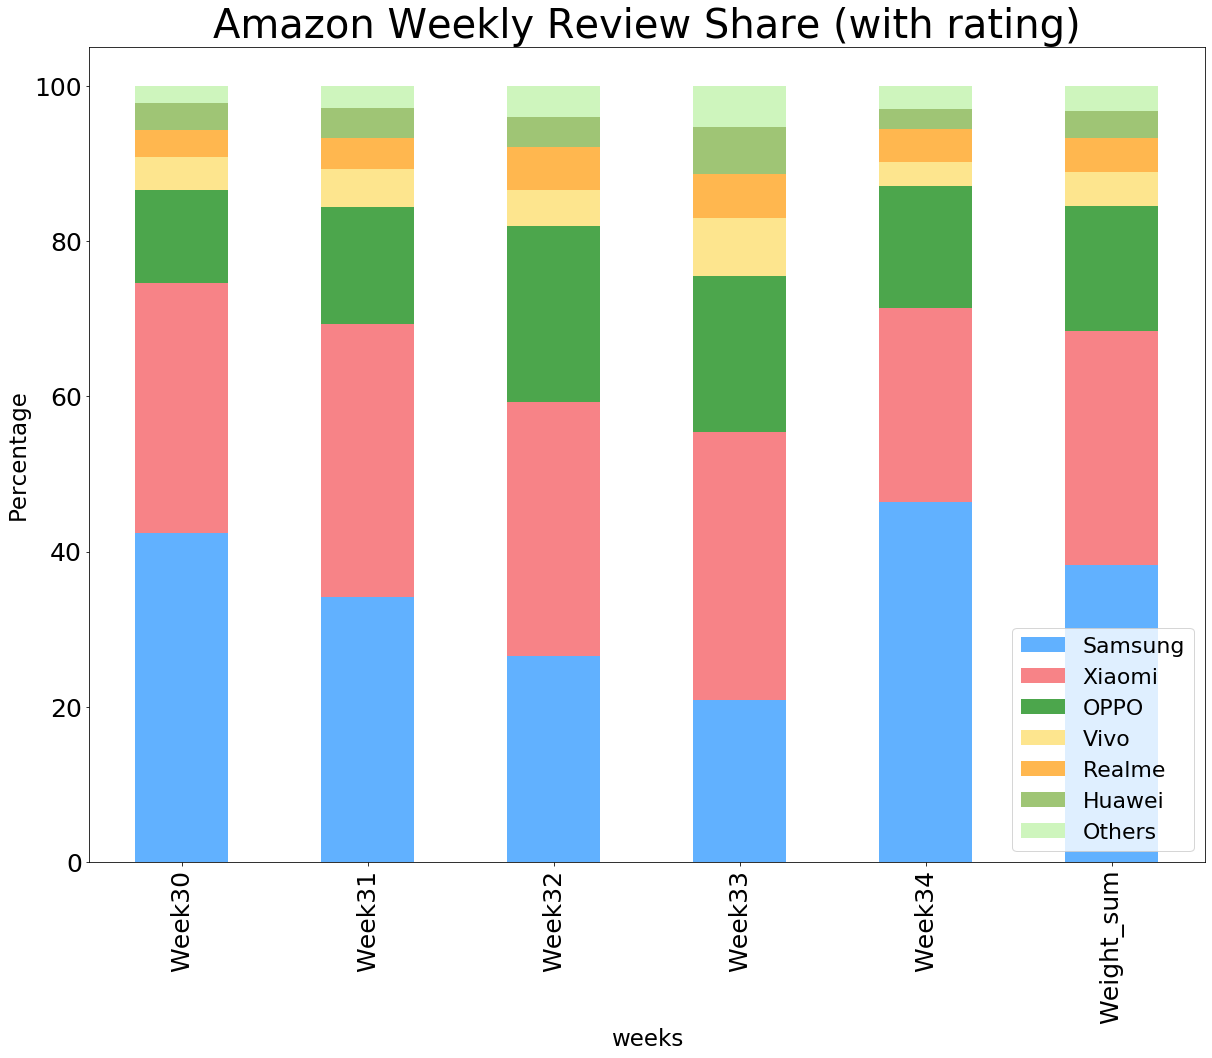

In [94]:
#[ 삼성 = 0A709A, 샤오미 = #F44E54, 리얼미 = #76AD3B,  오렌지 = #FF9904,  노랑 = #FDDB5E, #BAF1A1 =연두
# [ 초록 = #76AD3B, skyblue, #F44E54= 연한 레드계열


# 누적막대그래프 만들기
rating_vendor_per.plot.bar(stacked=True, fontsize=25,
                          colors =['dodgerblue','#F44E54', 'green' , '#FDDB5E' ,'#FF9904', '#76AD3B' ,'#BAF1A1'], alpha = 0.7)

# Set the title and labels

plt.rcParams['figure.figsize'] = [15, 13]
plt.legend(fontsize = 22, loc='lower right')
plt.xlabel('weeks', fontsize=23)
plt.ylabel('Percentage', fontsize=23)
plt.title('Amazon Weekly Review Share (with rating)', fontsize=40)


# show the plot
plt.show()

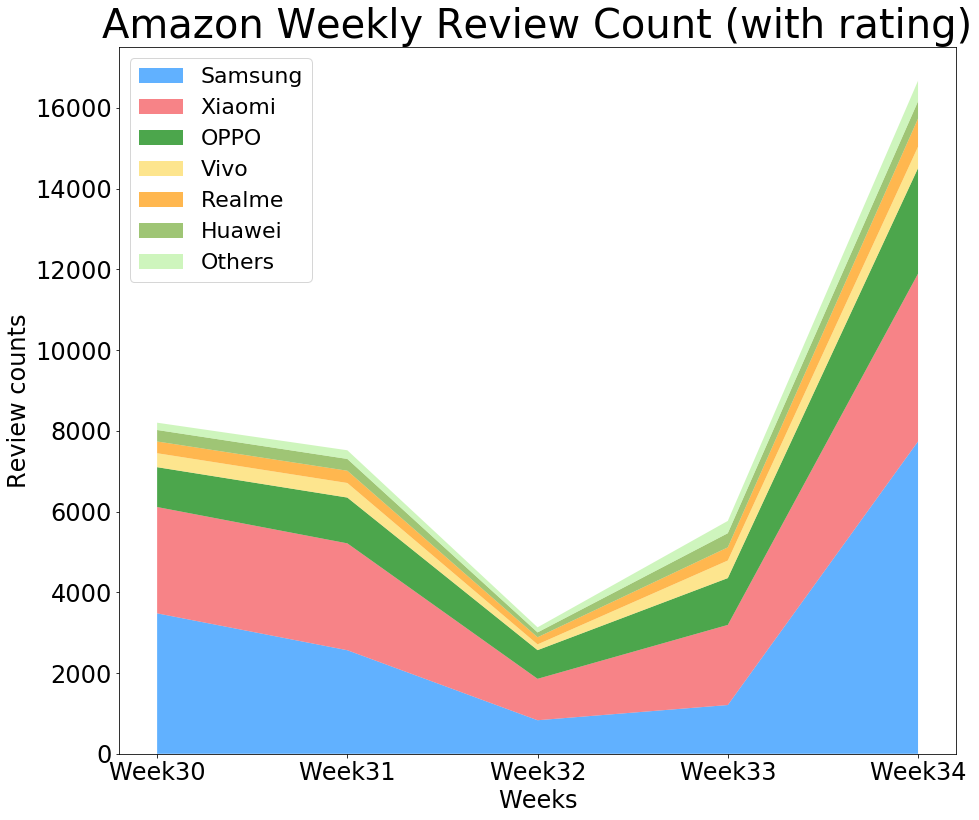

In [95]:
x= rating_vendor_review_count.columns[0:]
y=  rating_vendor_review_count[0:]

pal = ['dodgerblue','#F44E54', 'green' , '#FDDB5E' ,'#FF9904', '#76AD3B' ,'#BAF1A1']
plt.stackplot(x,y, labels=['Samsung', 'Xiaomi', 'OPPO', 'Vivo', 'Realme', 'Huawei', 'Others'], 
              colors=pal, alpha=0.7 )

plt.title("Amazon Weekly Review Count (with rating)", fontsize=40, fontweight=0, color='black')
plt.xlabel("Weeks", fontsize = 24)
plt.xticks(fontsize = 24)

plt.ylabel("Review counts", fontsize = 24)
plt.yticks(fontsize = 24)

plt.legend(loc='upper left', fontsize = 22)
plt.show()
 